In [1]:
# import numpy as np
# import scipy.sparse as sp

# # Load the .npz file
# data = np.load('/home/dan/google-research/graph_embedding/dmon/data/cora.npz')

# # Extract the data using the correct keys
# labels = data['labels']
# label_indices = data['label_indices']
# feature_data = data['feature_data']
# feature_indices = data['feature_indices']
# feature_indptr = data['feature_indptr']
# feature_shape = data['feature_shape']
# adj_data = data['adj_data']
# adj_indices = data['adj_indices']
# adj_indptr = data['adj_indptr']
# adj_shape = data['adj_shape']

# # Reconstruct the sparse matrices
# features = sp.csr_matrix((feature_data, feature_indices, feature_indptr), shape=feature_shape)
# adj = sp.csr_matrix((adj_data, adj_indices, adj_indptr), shape=adj_shape)

# print("Adjacency Matrix Shape:", adj.shape)
# print("Feature Matrix Shape:", features.shape)
# print("Labels Shape:", labels.shape)
import pandas as pd

# Load the uploaded CSV file
file_path = '/home/dan/google-research/Aras_transactions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,factor_id,customers_id,price_purchase,art_name,price_item,BranchCode,date,d_dat,articles_id
0,5,9120623592,220000.0,مگا برگر,83500.0,13813.0,1400-12-21,2022-03-12,1000.0
1,5,9120623592,220000.0,پيتزا چهار فصل,103500.0,13813.0,1400-12-21,2022-03-12,1001.0
2,50,9397257065,158500.0,پيتزا پپروني,88500.0,13813.0,1400-12-23,2022-03-14,1002.0
3,50,9397257065,158500.0,سيب زميني مخصوص,42500.0,13813.0,1400-12-23,2022-03-14,1003.0
4,50,9397257065,158500.0,زيرو قوطي,17400.0,13813.0,1400-12-23,2022-03-14,1004.0


In [2]:
import numpy as np
import scipy.sparse as sp

# Select relevant features for clustering
features = data[['price_purchase', 'price_item']].values

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)

Feature Matrix Shape: (3955561, 2)


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a customer-transaction matrix
customer_transaction_matrix = data.pivot_table(index='customers_id', columns='articles_id', values='price_purchase', fill_value=0)

# Compute cosine similarity between customers
similarity_matrix = cosine_similarity(customer_transaction_matrix)

# Convert similarity to an adjacency matrix (threshold or directly use similarity)
threshold = 0.5
adjacency_matrix = (similarity_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-loops

# Convert adjacency matrix to a sparse matrix
adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

Adjacency Matrix Shape: (67, 67)


In [3]:
# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price_item'])

# Extract the features
features = data_unique[['price_purchase', 'price_item']].values

# Convert features to a sparse matrix
import scipy.sparse as sp
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)


Feature Matrix Shape: (3778904, 2)


In [4]:
# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)


Customer-Transaction Matrix Shape: (521706, 340)


In [5]:
customer_transaction_matrix

articles_id,1000.0,1001.0,1002.0,1003.0,1004.0,1005.0,1006.0,1007.0,1008.0,1009.0,...,1378.0,1380.0,1381.0,1382.0,1383.0,1384.0,1385.0,1386.0,1387.0,1388.0
customers_id,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891223414180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9891917513980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9893029237760,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between customers
similarity_matrix = cosine_similarity(customer_transaction_matrix)

# Convert similarity to an adjacency matrix (threshold or directly use similarity)
threshold = 0.5
adjacency_matrix = (similarity_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-loops

# Convert adjacency matrix to a sparse matrix
adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)


MemoryError: Unable to allocate 1.98 TiB for an array with shape (521706, 521706) and data type float64

In [14]:
similarity_matrix.shape

(67, 67)

In [31]:
import numpy as np
import scipy.sparse as sp

# Load the existing data
file_path = '/home/dan/google-research/customer_data.npz'
data = np.load(file_path)

# Extract the existing matrices
adjacency_matrix = sp.csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])
feature_matrix = sp.csr_matrix((data['feature_data'], data['feature_indices'], data['feature_indptr']), shape=data['feature_shape'])

# Verify the dimensions
print("Adjacency Matrix Shape:", adjacency_matrix.shape)
print("Feature Matrix Shape:", feature_matrix.shape)

# Check the rows of the adjacency and feature matrices
print("Number of nodes in Adjacency Matrix:", adjacency_matrix.shape[0])
print("Number of nodes in Feature Matrix:", feature_matrix.shape[0])

# Assume that we want to filter the feature matrix to match the adjacency matrix
if adjacency_matrix.shape[0] < feature_matrix.shape[0]:
    feature_matrix = feature_matrix[:adjacency_matrix.shape[0], :]

# If adjacency matrix has fewer nodes, we need to create a corresponding subgraph or adjust the matrices accordingly.

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_data_with_labels_corrected.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_data_with_labels_corrected.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)



Adjacency Matrix Shape: (67, 67)
Feature Matrix Shape: (192, 2)
Number of nodes in Adjacency Matrix: 67
Number of nodes in Feature Matrix: 192
Loaded Adjacency Matrix Shape: (67, 67)
Loaded Feature Matrix Shape: (67, 2)
Loaded Labels Shape: (67,)
Loaded Label Indices Shape: (67,)


In [5]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from annoy import AnnoyIndex

# Load the uploaded CSV file
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data.head())

# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price'])

# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)

# Parameters for Annoy
n_trees = 10  # Number of trees in the Annoy index
num_neighbors = 10  # Number of nearest neighbors to search for each item

# Initialize Annoy index
n_features = customer_transaction_matrix.shape[1]
annoy_index = AnnoyIndex(n_features, 'angular')

# Add items to Annoy index
for i, v in enumerate(customer_transaction_matrix.values):
    annoy_index.add_item(i, v)

# Build the Annoy index
annoy_index.build(n_trees)

# Get nearest neighbors for each item
nearest_neighbors = []
for i in range(annoy_index.get_n_items()):
    neighbors = annoy_index.get_nns_by_item(i, num_neighbors)
    nearest_neighbors.append(neighbors)

# Create an adjacency matrix based on nearest neighbors
adjacency_matrix = np.zeros((len(nearest_neighbors), len(nearest_neighbors)))

for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        adjacency_matrix[i, neighbor] = 1

adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

# Extract the features
features = data_unique[['price_purchase', 'price']].drop_duplicates().values

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)

# Ensure the dimensions match
num_nodes_adj = adjacency_matrix.shape[0]
num_nodes_feat = feature_matrix.shape[0]

if num_nodes_adj < num_nodes_feat:
    feature_matrix = feature_matrix[:num_nodes_adj, :]
elif num_nodes_adj > num_nodes_feat:
    raise ValueError("Feature matrix has fewer nodes than adjacency matrix. Adjust your data preprocessing.")

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_burger.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_burger.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)


   factor_id  customers_id  price_purchase      art_name   branch        date  \
0        322    9123006834        452500.0  اسپرايت قوطي  13813.0  2022-03-28   
1        949    9127030430         96500.0  اسپرايت قوطي  13811.0  2020-09-21   
2       1082    9122174915        136000.0  اسپرايت قوطي  13811.0  2020-09-26   
3       1109    9122174915        218000.0  اسپرايت قوطي  13811.0  2020-09-26   
4       1866    9122174915        109000.0  اسپرايت قوطي  13811.0  2020-10-18   

   articles_id  target  group    price  
0       1023.0       1      3  19500.0  
1       1023.0       1      3  19500.0  
2       1023.0       1      3  19500.0  
3       1023.0       1      3  19500.0  
4       1023.0       1      3  19500.0  
Customer-Transaction Matrix Shape: (25331, 322)
Adjacency Matrix Shape: (25331, 25331)
Feature Matrix Shape: (139921, 2)
Loaded Adjacency Matrix Shape: (25331, 25331)
Loaded Feature Matrix Shape: (25331, 2)
Loaded Labels Shape: (25331,)
Loaded Label Indices Shape: (2

In [10]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from annoy import AnnoyIndex
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime

# Load the uploaded CSV file
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data.head())

# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price', 'group', 'branch', 'date'])

# Convert the date column to datetime
data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)

# Extract features from the date column
data_unique['day_of_week'] = data_unique['date'].dt.dayofweek
data_unique['month'] = data_unique['date'].dt.month

# One-hot encode categorical features
categorical_features = ['group', 'branch', 'day_of_week', 'month']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(data_unique[categorical_features])

# Extract and normalize numerical features
numerical_features = data_unique[['price_purchase', 'price']].values
scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Combine normalized numerical and encoded categorical features
features = np.hstack([normalized_numerical_features, encoded_categorical_features])

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)

# Parameters for Annoy
n_trees = 10  # Number of trees in the Annoy index
num_neighbors = 10  # Number of nearest neighbors to search for each item

# Initialize Annoy index
n_features = customer_transaction_matrix.shape[1]
annoy_index = AnnoyIndex(n_features, 'angular')

# Add items to Annoy index
for i, v in enumerate(customer_transaction_matrix.values):
    annoy_index.add_item(i, v)

# Build the Annoy index
annoy_index.build(n_trees)

# Get nearest neighbors for each item
nearest_neighbors = []
for i in range(annoy_index.get_n_items()):
    neighbors = annoy_index.get_nns_by_item(i, num_neighbors)
    nearest_neighbors.append(neighbors)

# Create an adjacency matrix based on nearest neighbors
adjacency_matrix = np.zeros((len(nearest_neighbors), len(nearest_neighbors)))

for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        adjacency_matrix[i, neighbor] = 1

adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

# Ensure the dimensions match
num_nodes_adj = adjacency_matrix.shape[0]
num_nodes_feat = feature_matrix.shape[0]

if num_nodes_adj < num_nodes_feat:
    feature_matrix = feature_matrix[:num_nodes_adj, :]
elif num_nodes_adj > num_nodes_feat:
    raise ValueError("Feature matrix has fewer nodes than adjacency matrix. Adjust your data preprocessing.")

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_burger.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_burger.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)


   factor_id  customers_id  price_purchase      art_name   branch        date  \
0        322    9123006834        452500.0  اسپرايت قوطي  13813.0  2022-03-28   
1        949    9127030430         96500.0  اسپرايت قوطي  13811.0  2020-09-21   
2       1082    9122174915        136000.0  اسپرايت قوطي  13811.0  2020-09-26   
3       1109    9122174915        218000.0  اسپرايت قوطي  13811.0  2020-09-26   
4       1866    9122174915        109000.0  اسپرايت قوطي  13811.0  2020-10-18   

   articles_id  target  group    price  
0       1023.0       1      3  19500.0  
1       1023.0       1      3  19500.0  
2       1023.0       1      3  19500.0  
3       1023.0       1      3  19500.0  
4       1023.0       1      3  19500.0  


/tmp/ipykernel_16752/1390881480.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_16752/1390881480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_16752/1390881480.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Customer-Transaction Matrix Shape: (25331, 322)
Adjacency Matrix Shape: (25331, 25331)
Loaded Adjacency Matrix Shape: (25331, 25331)
Loaded Feature Matrix Shape: (25331, 54)
Loaded Labels Shape: (25331,)
Loaded Label Indices Shape: (25331,)


In [ ]:
# Load cluster assignments
cluster_assignments = np.load('cluster_assignments.npy')

# Ensure the order of customers_id matches the order of cluster assignments
data_unique = data_unique.sort_values(by='customers_id').reset_index(drop=True)
cluster_assignments_df = pd.DataFrame({'customers_id': data_unique['customers_id'], 'cluster': cluster_assignments})

# Display the cluster assignments
print(cluster_assignments_df.head())

# Save the cluster assignments to a CSV file
cluster_assignments_df.to_csv('customer_cluster_assignments.csv', index=False)

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import scipy.sparse as sp

# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Convert date to timestamp
data['timestamp'] = data['date'].astype(np.int64) // 10**9

# Sort data by customers and date
data = data.sort_values(by=['customers_id', 'date'])

# Extract unique customers and articles
unique_customers = data['customers_id'].unique()
unique_articles = data['articles_id'].unique()

# Extract features from the date column
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# One-hot encode categorical features
categorical_features = ['group', 'branch', 'day_of_week', 'month']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(data[categorical_features])

# Extract numerical features
numerical_features = ['price_purchase', 'price']
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(data[numerical_features])

# Combine all features
features = np.hstack([encoded_categorical_features, scaled_numerical_features])


In [27]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'Last_Purchase_Date']
last_purchase_date['Recency'] = (data['date'].max() - last_purchase_date['Last_Purchase_Date']).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'Frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'Monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')
rfm = rfm[['customers_id', 'Recency', 'Frequency', 'Monetary']]

# Normalize RFM features
rfm['Recency'] = (rfm['Recency'] - rfm['Recency'].min()) / (rfm['Recency'].max() - rfm['Recency'].min())
rfm['Frequency'] = (rfm['Frequency'] - rfm['Frequency'].min()) / (rfm['Frequency'].max() - rfm['Frequency'].min())
rfm['Monetary'] = (rfm['Monetary'] - rfm['Monetary'].min()) / (rfm['Monetary'].max() - rfm['Monetary'].min())

# Create customer-item matrix
customer_item_matrix = data.pivot_table(index='customers_id', columns='articles_id', values='price_purchase', fill_value=0)
customer_item_matrix = (customer_item_matrix > 0).astype(int)

def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    TL = max_time
    return np.sqrt(np.exp(-lambda_val * (TL - t_ui) / TL) * np.exp(-lambda_val * (TL - t_vi) / TL))

# Create adjacency matrix efficiently
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute unique dates
unique_dates = data['date'].unique()

# Normalize timestamps
data['timestamp'] = data['date'].map(pd.Timestamp.timestamp)
max_time = (data['timestamp'].max() - data['timestamp'].min())

for date in unique_dates:
    subset = data[data['date'] == date]
    for i, u in subset.iterrows():
        idx_u = customer_index[u['customers_id']]
        articles_u = data[data['customers_id'] == u['customers_id']]
        t_ui = u['timestamp']
        for j, v in subset.iterrows():
            if i >= j:
                continue
            idx_v = customer_index[v['customers_id']]
            articles_v = data[data['customers_id'] == v['customers_id']]
            t_vi = v['timestamp']
            common_articles = pd.merge(articles_u, articles_v, on='articles_id', suffixes=('_u', '_v'))
            if len(common_articles) == 0:
                continue

            tw = time_weight(t_ui, t_vi, max_time)
            numerator = len(common_articles) * tw  # Number of common articles
            denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw  # Product of the number of articles bought by u and v
            if denominator > 0:
                adjacency_matrix[idx_u, idx_v] = numerator / denominator
                adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]


adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix.toarray())

# Prepare RFM feature matrix
feature_matrix = rfm[['Recency', 'Frequency', 'Monetary']].values
feature_matrix = csr_matrix(feature_matrix)

# Print feature matrix
print("Feature Matrix:")
print(feature_matrix.toarray())

# Save the adjacency matrix and feature matrix
np.savez('customer_rfm_data.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape)

# Verify loading from the new npz file
data_with_labels = np.load('customer_rfm_data.npz', allow_pickle=True)
adjacency_matrix_loaded = csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)

Adjacency Matrix:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 28. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Feature Matrix:
[[0.94215938 0.         0.0219414 ]
 [0.97000857 0.         0.00999861]
 [0.99657241 0.03703704 0.01388696]
 ...
 [0.09211654 0.         0.08929315]
 [0.54241645 0.         0.02652409]
 [0.         0.11111111 0.22413554]]
Loaded Adjacency Matrix Shape: (527, 527)
Loaded Feature Matrix Shape: (527, 3)


In [33]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Convert date to datetime and then to timestamp
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['timestamp'] = data['date'].map(datetime.timestamp)

# Normalize timestamps
max_time = data['timestamp'].max()

# Create time-weight function based on the provided formula
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create adjacency matrix efficiently
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

for idx_u, u in data.iterrows():
    customer_u = u['customers_id']
    articles_u = data[data['customers_id'] == customer_u]
    t_ui = u['timestamp']
    for idx_v, v in data.iterrows():
        if idx_u >= idx_v:
            continue
        customer_v = v['customers_id']
        articles_v = data[data['customers_id'] == customer_v]
        t_vi = v['timestamp']
        common_articles = pd.merge(articles_u, articles_v, on='articles_id', suffixes=('_u', '_v'))
        if len(common_articles) == 0:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw  # Number of common articles
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw  # Product of the number of articles bought by u and v

        if denominator > 0:
            adjacency_matrix[customer_index[customer_u], customer_index[customer_v]] = numerator / denominator
            adjacency_matrix[customer_index[customer_v], customer_index[customer_u]] = adjacency_matrix[customer_index[customer_u], customer_index[customer_v]]

# Normalize adjacency matrix values between 0 and 1
# adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
adjacency_matrix = csr_matrix(adjacency_matrix)

# Print non-zero values in adjacency matrix
non_zero_indices = adjacency_matrix.nonzero()
row_indices = non_zero_indices[0].tolist()
col_indices = non_zero_indices[1].tolist()
non_zero_values = adjacency_matrix.data.tolist()

non_zero_elements = list(zip(row_indices, col_indices, non_zero_values))
print("Non-zero elements (row, column, value):")
for element in non_zero_elements:
    print(element)

# Print adjacency matrix
print("Adjacency Matrix:\n", adjacency_matrix.toarray())

# Save adjacency matrix
np.savez('adjacency_matrix.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape)

# Generate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
current_date = data['date'].max()
last_purchase_date['recency'] = (current_date - last_purchase_date['last_purchase_date']).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Combine RFM features
rfm = pd.merge(last_purchase_date[['customers_id', 'recency']], frequency, on='customers_id')
rfm = pd.merge(rfm, monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Convert RFM features to a sparse matrix
rfm_matrix = csr_matrix(rfm[['recency', 'frequency', 'monetary']].values)

# Save RFM features
np.savez('rfm_features.npz', 
         feature_data=rfm_matrix.data, feature_indices=rfm_matrix.indices, feature_indptr=rfm_matrix.indptr, feature_shape=rfm_matrix.shape)

# Print RFM features
print("RFM Features:\n", rfm)

Non-zero elements (row, column, value):
(280, 464, 2.82842712474619)
(280, 508, 2.0)
(464, 280, 2.82842712474619)
(464, 508, 1.414213562373095)
(508, 280, 2.0)
(508, 464, 1.414213562373095)
Adjacency Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
RFM Features:
      customers_id   recency  frequency  monetary
0        22000201  0.942159   0.000000  0.000000
1        22000604  0.970009   0.000000  0.000000
2        22009616  0.996572   0.037037  0.037037
3        22019832  0.970437   0.037037  0.037037
4        22044882  0.870608   0.000000  0.000000
..            ...       ...        ...       ...
522    9912069693  0.194944   0.000000  0.000000
523    9912773025  0.493145   0.000000  0.000000
524    9912790161  0.092117   0.000000  0.000000
525    9913882048  0.542416   0.000000  0.000000
526    9915400271  0.000000   0.111111  0.111111

[527 rows x 4 columns]


In [35]:
# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer
articles_per_customer = {customer: set(data[data['customers_id'] == customer]['articles_id']) for customer in customers}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
print("Adjacency Matrix:", adjacency_matrix)
print("Non-zero entries:", adjacency_matrix.nnz)

Adjacency Matrix:   (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  :	:
  (526, 501)	1.0
  (526, 502)	1.0
  (526, 503)	1.0
  (526, 504)	1.0
  (526, 505)	1.0
  (526, 506)	1.0
  (526, 507)	1.0
  (526, 508)	1.0
  (526, 509)	1.0
  (526, 510)	1.0
  (526, 511)	1.0
  (526, 512)	1.0
  (526, 513)	1.0
  (526, 514)	1.0
  (526, 515)	1.0
  (526, 516)	1.0
  (526, 517)	1.0
  (526, 518)	1.0
  (526, 519)	1.0
  (526, 520)	1.0
  (526, 521)	1.0
  (526, 522)	1.0
  (526, 523)	1.0
  (526, 524)	1.0
  (526, 525)	1.0
Non-zero entries: 277202


In [6]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))

# Shuffle customer IDs
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer
articles_per_customer = {customer: set(data[data['customers_id'] == customer]['articles_id']) for customer in customers}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

# Load data
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

# Split data into parts
customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))
np.random.shuffle(customer_ids)

part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer and timestamps
articles_per_customer = data.groupby('customers_id')['articles_id'].apply(set).to_dict()
timestamps_per_customer = data.groupby('customers_id')['timestamp'].apply(np.mean).to_dict()

# Vectorize the adjacency matrix creation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        
        common_articles = articles_u & articles_v  # Intersection of sets

        if not common_articles:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = numerator / denominator

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix /= adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [7]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

# Load data
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

# Split data into parts
customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))
np.random.shuffle(customer_ids)

part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Create RFM feature matrix
rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer and timestamps
articles_per_customer = data.groupby('customers_id')['articles_id'].apply(set).to_dict()
timestamps_per_customer = data.groupby('customers_id')['timestamp'].apply(np.mean).to_dict()

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = numerator / denominator

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez('customer_burger1.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Define a list of articles_id to exclude
exclude_articles = [1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388]

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.9 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)
# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Create RFM feature matrix
rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)


# Create time-weight function
# def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
#     return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer excluding the specified articles
articles_per_customer = {
    customer: set(data[(data['customers_id'] == customer) & (~data['articles_id'].isin(exclude_articles))]['articles_id']) 
    for customer in customers
}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = sum(time_weight(tu[1], tv[1], max_time) for tu in t_ui for tv in t_vi if tu[0] == tv[0])
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]


# # Create the adjacency matrix
# customers = data['customers_id'].unique()
# customer_index = {customer: idx for idx, customer in enumerate(customers)}
# n_customers = len(customers)
# adjacency_matrix = np.zeros((n_customers, n_customers))

# # Precompute articles per customer excluding the specified articles
# articles_per_customer = {
#     customer: set(data[(data['customers_id'] == customer) & (~data['articles_id'].isin(exclude_articles))]['articles_id']) 
#     for customer in customers
# }

# # Precompute timestamps per customer
# timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

# for idx_u, customer_u in enumerate(customers):
#     articles_u = articles_per_customer[customer_u]
#     t_ui = timestamps_per_customer[customer_u]
#     for idx_v, customer_v in enumerate(customers):
#         if idx_u >= idx_v:
#             continue
#         articles_v = articles_per_customer[customer_v]
#         t_vi = timestamps_per_customer[customer_v]
#         common_articles = articles_u.intersection(articles_v)

#         if len(common_articles) == 0:
#             continue

#         # tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
#         tw = time_weight(t_ui, t_vi, max_time)        
#         numerator = len(common_articles) * tw
#         denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

#         if denominator > 0:
#             adjacency_matrix[idx_u, idx_v] = numerator / denominator
#             adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Adjacency Matrix (Dense Format):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data saved in compressed format.


In [12]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Define a list of articles_id to exclude
exclude_articles = set([1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388])

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.95 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)
# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)

# Precompute time weights
def time_weight(t_ui, t_vi, max_time, lambda_val=0.001):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Precompute articles and timestamps per customer
filtered_data = data[~data['articles_id'].isin(exclude_articles)]
articles_per_customer = {customer: set(filtered_data[filtered_data['customers_id'] == customer]['articles_id']) for customer in customer_ids}
timestamps_per_customer = {customer: filtered_data[filtered_data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customer_ids}

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Optimized computation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = np.sum([time_weight(tu[1], tv[1], max_time) for tu in t_ui for tv in t_vi if tu[0] == tv[0]])
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
adjacency_matrix = csr_matrix(adjacency_matrix)

# Print the number of non-zero values in the adjacency matrix
non_zero_values = adjacency_matrix.nnz
print(f"Number of non-zero values in the adjacency matrix: {non_zero_values}")

dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Number of non-zero values in the adjacency matrix: 1694
Adjacency Matrix (Dense Format):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data saved in compressed format.


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    # Convert InvoiceDate to datetime type
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Convert InvoiceDate to datetime and extract only the date
    df['InvoiceDay'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M', errors='coerce').dt.strftime('%m-%d-%Y')
    df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'], errors='coerce')
    
    # Find the most recent purchase date for each customer
    customer_data = df.groupby('customers_id')['InvoiceDay'].max().reset_index()
    customer_data1 = df.groupby('customers_id')['InvoiceDay'].min().reset_index()
    
    # Find the most recent date in the entire dataset
    most_recent_date = df['InvoiceDay'].max()

    # Convert InvoiceDay to datetime type before subtraction
    customer_data1['FirstPurchaseDate'] = pd.to_datetime(customer_data1['InvoiceDay'])
    customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
    most_recent_date = pd.to_datetime(most_recent_date)

    # Calculate the number of days since the last purchase for each customer
    customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
    customer_data['Days_Since_First_Purchase'] = (most_recent_date - customer_data1['FirstPurchaseDate']).dt.days
    
    # Remove the InvoiceDay column
    customer_data.drop(columns=['InvoiceDay'], inplace=True)
    
    # Calculate the total number of transactions made by each customer
    total_transactions = df.groupby('customers_id')['factor_id'].nunique().reset_index()
    total_transactions.rename(columns={'factor_id': 'Total_Transactions'}, inplace=True)

    # Calculate the total number of products purchased by each customer
    total_products_purchased = df.groupby('customers_id')['amount'].sum().reset_index()
    total_products_purchased.rename(columns={'amount': 'Total_Products_Purchased'}, inplace=True)

    # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, total_transactions, on='customers_id')
    customer_data = pd.merge(customer_data, total_products_purchased, on='customers_id')
    
    # Calculate Amount_Per_Transaction_Value
    customer_data['Amount_Per_Transaction_Value'] = customer_data['Total_Products_Purchased'] / customer_data['Total_Transactions']

        # Calculate total spend for each transaction by each customer
    df['Total_Spend'] = df['price'] * df['amount']
    total_spend = df.groupby('customers_id')['Total_Spend'].sum().reset_index()

    # Calculate the total spend for each transaction by each customer
    transaction_totals = df.groupby(['customers_id', 'factor_id', 'date'])['Total_Spend'].sum().reset_index()

    # Find the most expensive cart for each customer
    most_expensive_cart = transaction_totals.groupby('customers_id')['Total_Spend'].max().reset_index()
    most_expensive_cart.rename(columns={'Total_Spend': 'Most_Expensive_Cart'}, inplace=True)

    # Calculate average transaction value
    average_transaction_value = total_spend.merge(total_transactions, on='customers_id')
    average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

    # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, most_expensive_cart, on='customers_id', how='left')
    customer_data = pd.merge(customer_data, total_spend, on='customers_id', how='left')
    customer_data = pd.merge(customer_data, average_transaction_value[['customers_id', 'Average_Transaction_Value']], on='customers_id', how='left')

    product_transactions = df.groupby(['customers_id', 'articles_id'])['factor_id'].nunique().reset_index()
    product_transactions.rename(columns={'factor_id': 'Unique_Transactions_Per_Product'}, inplace=True)

    # Identify products that were purchased more than once in different transactions
    rebuys_per_product = product_transactions[product_transactions['Unique_Transactions_Per_Product'] > 1]

    # Count these rebuys for each customer
    rebuy_transactions = rebuys_per_product.groupby('customers_id')['Unique_Transactions_Per_Product'].count().reset_index()
    rebuy_transactions.rename(columns={'Unique_Transactions_Per_Product': 'Number_of_Rebuy_Carts'}, inplace=True)

    # Count the total number of unique carts per customer
    total_carts = df.groupby('customers_id')['factor_id'].nunique().reset_index()
    total_carts.rename(columns={'factor_id': 'Total_Carts'}, inplace=True)

    # Merge to calculate the ratio
    rebuy_ratio = pd.merge(rebuy_transactions, total_carts, on='customers_id', how='left')
    rebuy_ratio['Rebuy_Ratio'] = rebuy_ratio['Number_of_Rebuy_Carts'] / rebuy_ratio['Total_Carts']

    # Merge this data with the existing customer_data DataFrame
    customer_data = pd.merge(customer_data, rebuy_ratio[['customers_id', 'Rebuy_Ratio']], on='customers_id', how='left')

    # Sort the DataFrame by customer and date
    df_sorted = df.sort_values(by=['customers_id', 'date'])

    # Calculate the difference in days between each purchase for each customer
    df_sorted['Time_Difference'] = df_sorted.groupby('customers_id')['date'].diff().dt.days

    # Find the maximum time difference for each customer
    max_time_without_purchase = df_sorted.groupby('customers_id')['Time_Difference'].max().reset_index()
    max_time_without_purchase.rename(columns={'Time_Difference': 'Max_Time_Without_Purchase'}, inplace=True)

    # Merge this data with the existing customer_data DataFrame
    customer_data = pd.merge(customer_data, max_time_without_purchase, on='customers_id', how='left')

    # Calculate the total number of unique transaction dates for each customer
    total_unique_dates = df.groupby('customers_id')['date'].nunique().reset_index(name='Total_Unique_Transaction_Dates')

    # Merge the max time without purchase data and total unique dates
    max_time_ratio = pd.merge(max_time_without_purchase, total_unique_dates, on='customers_id')

    # Calculate the ratio of max time without purchase to number of unique transaction dates
    max_time_ratio['Max_Time_Without_Purchase_Ratio'] = max_time_ratio['Max_Time_Without_Purchase'] / max_time_ratio['Total_Unique_Transaction_Dates']

    # Merge this data with the existing customer_data DataFrame
    customer_data = pd.merge(customer_data, max_time_ratio[['customers_id', 'Max_Time_Without_Purchase_Ratio']], on='customers_id', how='left')

    # Sort the DataFrame by customer and date
    df_sorted = df.sort_values(by=['customers_id', 'date'])

    # Calculate the difference in days between each purchase for each customer
    df_sorted['Time_Difference'] = df_sorted.groupby('customers_id')['date'].diff().dt.days

    # Drop rows where time difference is NaN (the first transaction for each customer)
    df_sorted = df_sorted.dropna(subset=['Time_Difference'])

    def weighted_mean_time_diffs(df):
        # Apply weights; the most recent purchase has the highest weight (reverse the order for weights)
        df['weights'] = np.arange(len(df)) ** 2
        return np.average(df['Time_Difference'], weights=df['weights'])

    # Group by customer and apply the weighted mean function
    weighted_means = df_sorted.groupby('customers_id').apply(weighted_mean_time_diffs).reset_index(name='Weighted_Mean_Time_Between_Purchases')

    # Merge this data with the existing customer_data DataFrame
    customer_data = pd.merge(customer_data, weighted_means, on='customers_id', how='left')

    # Replace NaN with 0 for customers with only one purchase or no purchases in the df
    customer_data['Weighted_Mean_Time_Between_Purchases'].fillna(0, inplace=True)

    def weighted_std(group):
        if len(group) < 2:
            return 0  # If there's less than two data points, return std dev as 0
        weights = np.arange(1, len(group) + 1) ** 2  # Increasing weights for more recent purchases
        mean = np.average(group, weights=weights)  # Weighted mean
        variance = np.average((group - mean) ** 2, weights=weights)  # Weighted variance
        return np.sqrt(variance)  # Weighted standard deviation

    # Group by customer and apply the weighted std function
    std_between_purchases = df_sorted.groupby('customers_id')['Time_Difference'].apply(weighted_std).reset_index(name='Std_Between_Purchases')

    # Merge this data with the existing customer_data DataFrame
    customer_data = pd.merge(customer_data, std_between_purchases,on='customers_id', how='left')

    # Replace NaN with 0 for customers with only one purchase or no purchases in df
    customer_data['Std_Between_Purchases'].fillna(0, inplace=True)

    # Function to calculate relative purchase value
    def calculate_rel_value(group):
        if len(group) < 5:
            first_value = group.iloc[0]['price']
            last_value = group.iloc[-1]['price']
            if first_value == 0:
                return np.nan  # Avoid division by zero
            return (last_value - first_value) / first_value
        else:
            fifth_from_last_value = group.iloc[-5]['price']
            last_value = group.iloc[-1]['price']
            if fifth_from_last_value == 0:
                return np.nan  # Avoid division by zero
            return (last_value - fifth_from_last_value) / fifth_from_last_value

    def calculate_relative_purchase_value(df):
        # Ensure 'date' is in datetime format and sort the DataFrame by 'customers_id' and 'date'
        df['date'] = pd.to_datetime(df['date'])
        df_sorted = df.sort_values(['customers_id', 'date'])

        # Calculate the relative purchase value for each customer
        rel_purchase_values = df_sorted.groupby('customers_id').apply(calculate_rel_value).reset_index(name='rel_purchase_value')

        return rel_purchase_values

    rel_purchase_values = calculate_relative_purchase_value(df)
    customer_data = pd.merge(customer_data, rel_purchase_values, on='customers_id', how='left')

    # Handle NaN values, replacing them with 0
    customer_data['rel_purchase_value'].fillna(0, inplace=True)

    # Function to categorize time frame variation
    def time_frame_var_row(row):
        mu = 0.3
        if row['rel_purchase_value'] < -mu:
            return 'steady'
        elif abs(row['rel_purchase_value']) <= mu:
            return 'within-limits'
        elif row['rel_purchase_value'] > mu:
            return 'altering'

    def time_frame_char(df):
        df['time_frame_char'] = df.apply(time_frame_var_row, axis=1)
        return df

    customer_data = time_frame_char(customer_data)

    # Encode time_frame_char using LabelEncoder
    label_encoder = LabelEncoder()
    customer_data['time_frame_char'] = label_encoder.fit_transform(customer_data['time_frame_char'])

    # Calculate the number of unique products purchased by each customer
    unique_products_purchased = df.groupby('customers_id')['articles_id'].nunique().reset_index()
    unique_products_purchased.rename(columns={'articles_id': 'Unique_Products_Purchased'}, inplace=True)

    # Merge the new feature into the customer_data dataframe
    customer_data = pd.merge(customer_data, unique_products_purchased, on='customers_id')
    customer_data['unique_Per_Transaction_Value'] = customer_data['Unique_Products_Purchased'] / customer_data['Total_Transactions']

    # Extract day of week and hour from InvoiceDate
    df['Day_Of_Week'] = df['date'].dt.dayofweek
    df['Hour'] = df['date'].dt.hour
    df['PurchaseMonth'] = df['date'].dt.month

    # Find the most common purchase month for each customer
    common_month_data = df.groupby('customers_id')['PurchaseMonth'].agg(lambda x: x.mode()[0]).reset_index()
    common_month_data.rename(columns={'PurchaseMonth': 'MostCommonPurchaseMonth'}, inplace=True)

    # Calculate the average number of days between consecutive purchases
    days_between_purchases = df.groupby('customers_id')['date'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
    average_days_between_purchases = days_between_purchases.groupby('customers_id').mean().reset_index()
    average_days_between_purchases.rename(columns={'date': 'Average_Days_Between_Purchases'}, inplace=True)

    # Find the favorite shopping day of the week
    favorite_shopping_day = df.groupby(['customers_id', 'Day_Of_Week']).size().reset_index(name='Count')
    favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('customers_id')['Count'].idxmax()][['customers_id', 'Day_Of_Week']]

    # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, average_days_between_purchases, on='customers_id')
    customer_data = pd.merge(customer_data, favorite_shopping_day, on='customers_id')
    customer_data = pd.merge(customer_data, common_month_data, on='customers_id')

    # Extract month and year from InvoiceDate
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    # Calculate monthly spending for each customer
    monthly_spending = df.groupby(['customers_id', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

    # Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
    seasonal_buying_patterns = monthly_spending.groupby('customers_id')['Total_Spend'].agg(['mean', 'std']).reset_index()
    seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

    # Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
    seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

    # Calculate Trends in Spending 
    # We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
    def calculate_trend(spend_data):
        # If there are more than one data points, we calculate the trend using linear regression
        if len(spend_data) > 1:
            x = np.arange(len(spend_data))
            slope, _, _, _, _ = linregress(x, spend_data)
            return slope
        # If there is only one data point, no trend can be calculated, hence we return 0
        else:
            return 0

    # Apply the calculate_trend function to find the spending trend for each customer
    spending_trends = monthly_spending.groupby('customers_id')['Total_Spend'].apply(calculate_trend).reset_index()
    spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

    # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='customers_id')
    customer_data = pd.merge(customer_data, spending_trends, on='customers_id')

    # Create a mapping of group categories to numbers
    category_mapping = {category: i + 1 for i, category in enumerate(df['group'].unique())}

    # Map the group_category to its corresponding number
    df['category_number1'] = df['group'].map(category_mapping)

    # Group by 'customer_id' and 'category_number', count occurrences, and find the most purchased category for each customer
    most_purchased_per_customer = df.groupby(['customers_id', 'category_number1']).size().reset_index(name='purchase_count')
    most_purchased_per_customer = most_purchased_per_customer.sort_values('purchase_count', ascending=False).drop_duplicates('customers_id')

    # Get the overall most purchased category number for each customer
    overall_most_purchased_per_customer = most_purchased_per_customer.groupby('customers_id')['category_number1'].first().reset_index()

    # Merge the overall most purchased information back into the original customer_data DataFrame
    customer_data = pd.merge(customer_data, overall_most_purchased_per_customer, on='customers_id', how='left')

    # Create a mapping of group categories to numbers
    category_mapping = {category: i + 1 for i, category in enumerate(df['branch'].unique())}

    # Map the group_category to its corresponding number
    df['category_number2'] = df['branch'].map(category_mapping)

    # Group by 'customer_id' and 'category_number', count occurrences, and find the most purchased category for each customer
    most_purchased_per_customer = df.groupby(['customers_id', 'category_number2']).size().reset_index(name='purchase_count')
    most_purchased_per_customer = most_purchased_per_customer.sort_values('purchase_count', ascending=False).drop_duplicates('customers_id')

    # Get the overall most purchased category number for each customer
    overall_most_purchased_per_customer = most_purchased_per_customer.groupby('customers_id')['category_number2'].first().reset_index()

    # Merge the overall most purchased information back into the original customer_data DataFrame
    customer_data = pd.merge(customer_data, overall_most_purchased_per_customer, on='customers_id', how='left')

    # Discretize features
    bins1 = [0, 20, 40, 60, 80, 100, np.inf]
    labels1 = ['0-20', '21-40', '41-60', '61-80', '81-100', '101+']
    customer_data['Total_Products_Purchased_Bin'] = pd.cut(customer_data['Total_Products_Purchased'], bins=bins1, labels=labels1)

    bins3 = [0, 10, 20, 40, np.inf]
    labels3 = ['0-10', '11-20', '21-40', '41+']
    customer_data['Total_Transactions_Bin'] = pd.cut(customer_data['Total_Transactions'], bins=bins3, labels=labels3)

    bins4 = [0, 6, 12, 20, np.inf]
    labels4 = ['0-6', '7-12', '13-20','20+']
    customer_data['Unique_Products_Purchased_Bin'] = pd.cut(customer_data['Unique_Products_Purchased'], bins=bins4, labels=labels4)

    # Discretize features
    bins2 = [0, 500000, 750000, 1000000, 1300000, 1500000, np.inf]
    labels2 = ['0-500000', '500000-750000', '750000-1000000', '1000000-1300000', '1300000-1500000', '1500000+']   
    customer_data['Most_Expensive_Cart_Bin'] = pd.cut(customer_data['Most_Expensive_Cart'], bins=bins2, labels=labels2)

    bins5 = [0, 2500000, 4000000, 5000000, 8000000, 10000000, np.inf]
    labels5 = ['0-2500000', '2500000-4000000', '4000000-5000000', '5000000-8000000', '8000000-10000000', '10000000+']   
    customer_data['Total_Spend_Bin'] = pd.cut(customer_data['Total_Spend'], bins=bins5, labels=labels5)

    # Discretize time-related features
    bins_time = [-np.inf, 30, 90, 180, 360, np.inf]
    labels_time = ['0-30', '31-90', '91-180', '181-360', '361+']
    customer_data['Days_Since_Last_Purchase_Bin'] = pd.cut(customer_data['Days_Since_Last_Purchase'], bins=bins_time, labels=labels_time)
    customer_data['Max_Time_Without_Purchase_Bin'] = pd.cut(customer_data['Max_Time_Without_Purchase'], bins=bins_time, labels=labels_time)

    bins_time1 = [-np.inf, 30, 180, 360, 720, np.inf]
    labels_time1 = ['0-30', '30-180', '181-360', '361-720', '721+']
    customer_data['Days_Since_First_Purchase_Bin'] = pd.cut(customer_data['Days_Since_First_Purchase'], bins=bins_time1, labels=labels_time1)

    bins_time2 = [-np.inf, 10, 20, 30, 60, np.inf]
    labels_time2 = ['0-10', '10-20', '21-30', '31-60', '61+']
    customer_data['Average_Days_Between_Purchases_Bin'] = pd.cut(customer_data['Average_Days_Between_Purchases'], bins=bins_time2, labels=labels_time2)

    # Encode categorical features
    encodecolumns = ['time_frame_char', 'Total_Products_Purchased_Bin', 'Total_Transactions_Bin', 'Unique_Products_Purchased_Bin',
                    'Most_Expensive_Cart_Bin', 'Total_Spend_Bin', 'Days_Since_Last_Purchase_Bin', 'Max_Time_Without_Purchase_Bin',
                    'Days_Since_First_Purchase_Bin', 'Average_Days_Between_Purchases_Bin']

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    for feature in encodecolumns:
        # Fit label encoder and transform the feature
        customer_data[feature] = label_encoder.fit_transform(customer_data[feature])

    # Show the transformed DataFrame
    print(customer_data.head())

    from sklearn.feature_selection import VarianceThreshold
    from sklearn.ensemble import IsolationForest

    # Apply Variance Threshold
    selector = VarianceThreshold(threshold=(.7 * (1 - .7)))
    df_var_thresh = selector.fit_transform(customer_data)

    # Convert back to DataFrame
    df_var_thresh = pd.DataFrame(df_var_thresh, columns=customer_data.columns[selector.get_support()])

    # Calculate correlation matrix
    corr_matrix = df_var_thresh.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
    df_corr = df_var_thresh.drop(columns=to_drop)

    customer_data = df_corr

    # # Initializing the IsolationForest model with a contamination parameter of 0.1
    # model = IsolationForest(contamination=0.1, random_state=64)
    # # Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
    # customer_data['Outlier_Scores'] = model.fit_predict(customer_data.to_numpy())

    # # Creating a new column to identify outliers (1 for inliers and -1 for outliers)
    # customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

    # # Display the first few rows of the customer_data dataframe
    # customer_data.head()

    # # Separate the outliers for analysis
    # outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

    # # Remove the outliers from the main dataset
    # customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

    # # Drop the 'Outlier_Scores' and 'Is_Outlier' columns
    # customer_data = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

    # Reset the index of the cleaned data
    customer_data.reset_index(drop=True, inplace=True)
    return customer_data

In [3]:
from sklearn.preprocessing import MinMaxScaler

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)
data['amount'] = 1
customer_data_cleaned = preprocess(data)

# Extract features for DMoN
features = customer_data_cleaned.drop(columns=['customers_id'])
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

/tmp/ipykernel_335/1658826215.py:129: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = df_sorted.groupby('customers_id').apply(weighted_mean_time_diffs).reset_index(name='Weighted_Mean_Time_Between_Purchases')
/tmp/ipykernel_335/1658826215.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value)

   customers_id  Days_Since_Last_Purchase  Days_Since_First_Purchase  \
0             0                       366                       3079   
1             1                       592                       2516   
2          1234                      1133                       1644   
3         12340                      1488                       1503   
4         23571                      1671                       2748   

   Total_Transactions  Total_Products_Purchased  Amount_Per_Transaction_Value  \
0                  95                       208                      2.189474   
1                  11                        22                      2.000000   
2                 419                      1109                      2.646778   
3                  89                       235                      2.640449   
4                  20                        47                      2.350000   

   Most_Expensive_Cart  Total_Spend  Average_Transaction_Value  Rebuy_Ratio  \
0

In [11]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Convert data types to save memory
data['customers_id'] = data['customers_id'].astype('int32')
data['articles_id'] = data['articles_id'].astype('int32')
data['date'] = pd.to_datetime(data['date'])
data['price_purchase'] = data['price_purchase'].astype('float32')
data['amount'] = 1
# Define a list of articles_id to exclude
exclude_articles = set([1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388])

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.95 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)

# Normalize timestamps
data['timestamp'] = data['date'].map(datetime.timestamp)
min_time = data['timestamp'].min()
max_time = data['timestamp'].max()

# Normalize timestamps to be between 0 and 1 and convert to float16
data['timestamp'] = ((data['timestamp'] - min_time) / (max_time - min_time)).astype('float16')

# Print the first few timestamps to see their values
print("Timestamps (first 10):")
print(data['timestamp'].head(10))

customer_data_cleaned = preprocess(data)

# Extract features for DMoN
features = customer_data_cleaned.drop(columns=['customers_id'])
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# # Calculate RFM features
# last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
# last_purchase_date.columns = ['customers_id', 'last_purchase_date']
# last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

# frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
# frequency.columns = ['customers_id', 'frequency']

# monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
# monetary.columns = ['customers_id', 'monetary']

# rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

# rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
# rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
# rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(features_scaled)

# Precompute time weights
def time_weight(t_ui, t_vi, lambda_val=2.5):
    return np.sqrt(np.exp(-lambda_val * (1 - t_ui)) * np.exp(-lambda_val * (1 - t_vi)))

# Precompute articles and timestamps per customer
filtered_data = data[~data['articles_id'].isin(exclude_articles)]
articles_per_customer = {customer: set(filtered_data[filtered_data['customers_id'] == customer]['articles_id']) for customer in customer_ids}
timestamps_per_customer = {customer: filtered_data[filtered_data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customer_ids}

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers), dtype=np.float32)

# Optimized computation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = 0
        for tu in t_ui:
            for tv in t_vi:
                if tu[0] == tv[0]:
                    tw = time_weight(tu[1], tv[1])
                    tw_sum += tw
                    # print(f"Time Weight for article {tu[0]} between customer {customer_u} and {customer_v}: {tw}")
        
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]
            # print(f"Adjacency value between customer {customer_u} and {customer_v}: {adjacency_matrix[idx_u, idx_v]}")

# adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
# adjacency_matrix = csr_matrix(adjacency_matrix)

# Apply log transform and Min-Max scaling to the adjacency matrix
adjacency_matrix = np.log1p(adjacency_matrix)  # Log transform
scaler = MinMaxScaler()
adjacency_matrix = scaler.fit_transform(adjacency_matrix)

adjacency_matrix = csr_matrix(adjacency_matrix)


# Print the number of non-zero values in the adjacency matrix
non_zero_values = adjacency_matrix.nnz
print(f"Number of non-zero values in the adjacency matrix: {non_zero_values}")

# Print the number of nodes
num_nodes = adjacency_matrix.shape[0]
print(f"Number of nodes: {num_nodes}")

dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

print("Feature Matrix:")
print(feature_matrix.toarray())
print("Loaded Adjacency Matrix Shape:", adjacency_matrix.shape)
print("Loaded Feature Matrix Shape:", feature_matrix.shape)
# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Timestamps (first 10):
31     0.670410
34     0.514160
37     0.674316
53     0.516602
54     0.517090
56     0.685059
69     0.513184
75     0.521973
84     0.695312
103    0.517578
Name: timestamp, dtype: float16


/tmp/ipykernel_335/388470078.py:129: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = df_sorted.groupby('customers_id').apply(weighted_mean_time_diffs).reset_index(name='Weighted_Mean_Time_Between_Purchases')
/tmp/ipykernel_335/388470078.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) i

   customers_id  Days_Since_Last_Purchase  Days_Since_First_Purchase  \
0   -1419547592                       755                       1038   
1   -1180740312                       348                        778   
2   -1176871912                        95                        969   
3   -1175064602                      1654                       2063   
4   -1144730162                       125                       2119   

   Total_Transactions  Total_Products_Purchased  Amount_Per_Transaction_Value  \
0                  15                        32                      2.133333   
1                  10                        38                      3.800000   
2                  13                        31                      2.384615   
3                  12                        30                      2.500000   
4                  13                        35                      2.692308   

   Most_Expensive_Cart  Total_Spend  Average_Transaction_Value  Rebuy_Ratio  \
0

In [ ]:
print("Feature Matrix:")
print(feature_matrix.toarray())
print("Loaded Adjacency Matrix Shape:", adjacency_matrix.shape)
print("Loaded Feature Matrix Shape:", feature_matrix.shape)

Feature Matrix:
[[0.28772866 0.28525641 0.06944444 ... 1.         1.         0.        ]
 [0.13262195 0.20192308 0.         ... 0.25       1.         0.        ]
 [0.03620427 0.26314103 0.04166667 ... 0.25       1.         0.        ]
 ...
 [0.08307927 0.24711538 0.01388889 ... 1.         1.         0.5       ]
 [0.08536585 0.27820513 0.         ... 0.25       1.         0.5       ]
 [0.02934451 0.21570513 0.         ... 0.75       1.         0.        ]]
Loaded Adjacency Matrix Shape: (1267, 1267)
Loaded Feature Matrix Shape: (1140, 27)


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.from_scipy_sparse_array(adjacency_matrix)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, node_color="skyblue", font_size=4, font_weight="bold", edge_color="gray")
plt.title("Graph Visualization of Adjacency Matrix")
plt.show()


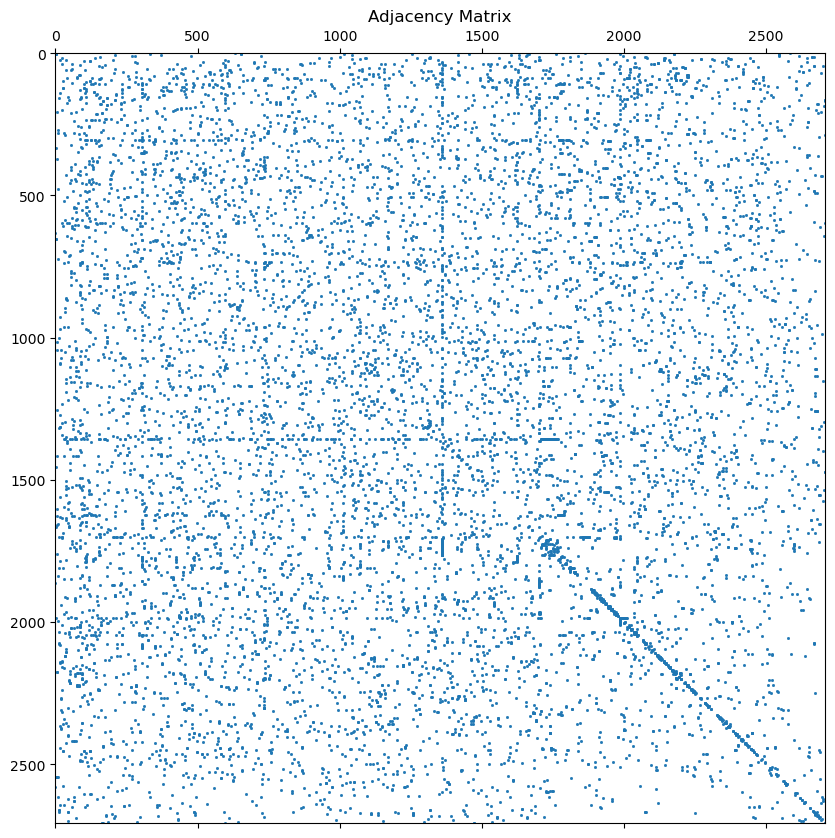

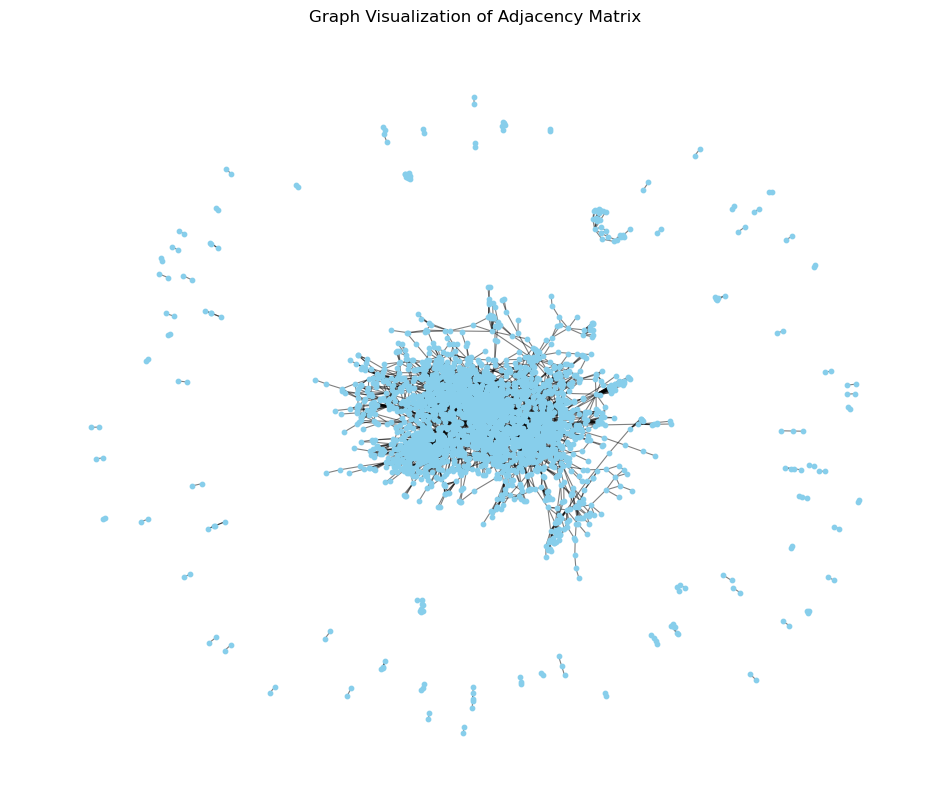

In [19]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Load the npz file
npz_file_path = '/home/dan/DMon/graph_embedding/dmon/data/cora.npz'
data = np.load(npz_file_path)

# Extract the adjacency matrix
adj_data = data['adj_data']
adj_indices = data['adj_indices']
adj_indptr = data['adj_indptr']
adj_shape = data['adj_shape']

adjacency_matrix = sp.csr_matrix((adj_data, adj_indices, adj_indptr), shape=adj_shape)

# Convert the sparse matrix to a dense format for plotting
dense_matrix = adjacency_matrix.todense()

# Plot the adjacency matrix
plt.figure(figsize=(10, 10))
plt.spy(dense_matrix, markersize=1)
plt.title("Adjacency Matrix")
plt.show()

G = nx.from_scipy_sparse_array(adjacency_matrix)

# Plot the graph
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
pos = nx.spring_layout(G)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="black", width=0.8)
nodes = nx.draw_networkx_nodes(G, pos, node_size=10, node_color="skyblue")
# labels = nx.draw_networkx_labels(G, pos, font_size=4, font_weight="bold")

plt.title("Graph Visualization of Adjacency Matrix")
plt.axis('off')
plt.show()
